## We want to use K-means to cluster this dataset.
## 1. We import all important libraries to help our job very easy. Then we we load our csv file inside folder in same directory. veiw the first 10 turples

In [60]:
#import important libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


In [61]:
#load dataset
colnames = ['Preg', 'Plas', 'Pres', 'Skin', 'Insu', 'BMI', 'Pedi', 'Age', 'Diag']
data = pd.read_csv("dataseets/pima-indians-diabetes.csv", header = None, names = colnames)
data.head(10)

,Preg,Plas,Pres,Skin,Insu,BMI,Pedi,Age,Diag
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 2.  let describe the data as it is before we do any thing on it. we shall have an idea of the data distribution

In [62]:

print('Before Processing')
data.describe()


Before Processing


,Preg,Plas,Pres,Skin,Insu,BMI,Pedi,Age,Diag
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3.  We have an idea of medecal data from our interactions with medical specialist that   data rows or columnc have values as zero. in medical records some of this valuse aught not be zero. So let check

In [63]:
#data.isnull().sum()
data.isin([0]).sum()

Preg    111
Plas      5
Pres     35
Skin    227
Insu    374
BMI      11
Pedi      0
Age       0
Diag    500
dtype: int64

## 4. Let us create a copy of out dataset before we start working with it

In [65]:
data2 = data.copy()
data2.head(10)

,Preg,Plas,Pres,Skin,Insu,BMI,Pedi,Age,Diag
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 5.  Pregranancy can be zero or 1. but all other do not have zero entries. Diagnosis or the target is 0 or 1 so we leave as it is. But all others will be replace with the mean value of each columns


In [66]:
#Nunmber of pregnacies can be zero
data2.Preg = data2.Preg.map(lambda x: 1 if x >=1 else 0)
#repalce missing values
cols = data2.columns[1:-3]
for col in cols:
    data2[col] = data2[col].replace(0, data2[col].mean())
#let us know if zeros has been replaced
data2.isin([0]).sum()

Preg    111
Plas      0
Pres      0
Skin      0
Insu      0
BMI       0
Pedi      0
Age       0
Diag    500
dtype: int64

## 5. We split X value 70 trainging and 30% testing

In [67]:
X = data2[data.columns[:-1]]#from index zero to index -1
y = data2[data.columns[-1]] #last index
#Data Scaled with mean = 0 and variance = 1 (Standardization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)



(768, 8)

## 5.We asign features to X and the target to Y , and scale the X values between 0 and 1

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)


(614, 8)
(154, 8)


## 6. PCA  to reduce features for data visualization

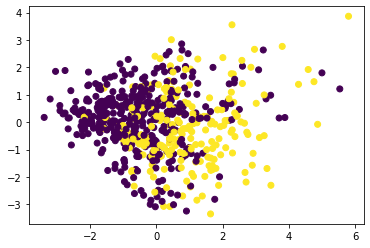

In [76]:
#PCA applied to reduce dimensionality to 2
pca = PCA(2)
X_train_decomposed = pca.fit_transform(X_train_scaled) 
X_test_decomposed = pca.transform(X_test_scaled)

#plot the scattered plot to visualize it
plt.scatter(X_train_decomposed[:,0], 
            X_train_decomposed[:,1],
            c = y_train)
plt.show()

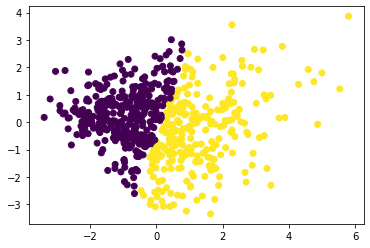

In [80]:
#Clustering data using K Means
kmeans = KMeans(2)
kmeans.fit(X_train_decomposed)
y_pred = kmeans.predict(X_test_decomposed)

plt.scatter(X_train_decomposed[:,0], 
            X_train_decomposed[:,1],
            c = kmeans.labels_)
plt.show()

In [81]:
test_score = accuracy_score(y_train, kmeans.labels_)
test_score = accuracy_score(y_test, y_pred)

print("accuracy for clustering train split: {:.2f}".format(train_score))
print("accuracy for clustering  test split: {:.2f}".format(test_score))

accuracy for clustering train split: 0.71
accuracy for clustering  test split: 0.77
